<a href="https://colab.research.google.com/github/LeeJeaHyuk/2021-2022-study/blob/main/2022datascience/fish_market_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
import os

In [4]:
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'

In [5]:
!kaggle datasets download -d aungpyaeap/fish-market
!unzip '*.zip'

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 1.71MB/s]
Archive:  fish-market.zip
  inflating: Fish.csv                


In [6]:
!ls

Fish.csv  fish-market.zip  sample_data


In [7]:
df = pd.read_csv('Fish.csv')

In [20]:
y=df['Species']
X=df.drop('Species', axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y_mapping = {index: label for index, label in enumerate(encoder.classes_)}

In [23]:
y_mapping
# 수치형으로 변환

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

In [40]:
from sklearn.model_selection import train_test_split
train_input,  test_input, train_target, test_target = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(train_input, train_target)

model_lr.score(test_input,test_target)

0.8541666666666666

In [44]:

inputs = tf.keras.Input(shape=(6,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

nn_model = tf.keras.Model(inputs=inputs, outputs=outputs)


nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 1000

history = nn_model.fit(
    train_input,
    train_target,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

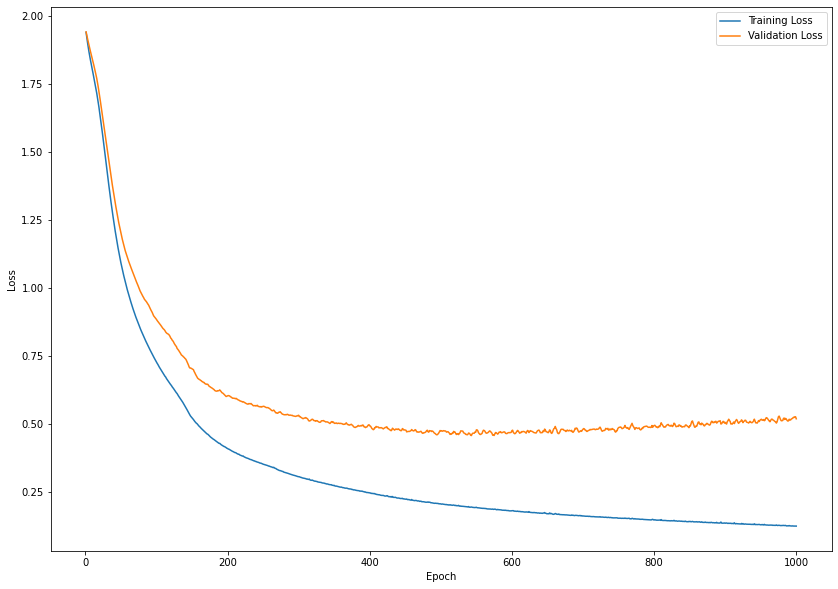

In [45]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [46]:
np.argmin(val_loss)

542

In [48]:
nn_model.evaluate(test_input, test_target)

2/2 [==============================] - 0s 7ms/step - loss: 0.5259 - accuracy: 0.9167


[0.52594393491745, 0.9166666865348816]

https://www.youtube.com/watch?v=n54LNfrIzXw